In [1]:
import rasterio
import numpy as np
from rasterio.plot import show

dataset = rasterio.open(r"C:/Users/PC/OneDrive/Робочий стіл/Geo/Lab_1/soil_m.tif")

In [2]:
array = dataset.read(1)
print(array)

[[65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 ...
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]]


In [3]:
avg = array[array != 65535].mean()
print(f'The average value of humidity: {avg}')

The average value of humidity: 3061.4033573708475


In [4]:
max = array[array != 65535].max()
max_count = array[array == max].size
max_row_col_index = np.where(array == max)
max_lot_lat = dataset.transform * (max_row_col_index[0][0], max_row_col_index[1][0])
print(f'The maximum value of humidity: {max}, amount: {max_count}, coordinates: {max_lot_lat}')

The maximum value of humidity: 3824, amount: 1, coordinates: (29.724966444000007, 49.999172646000005)


In [5]:
new_array = array.copy()
new_array[new_array == 65535] = 0
print(new_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
create_dataset = rasterio.open('/Users/PC/OneDrive/Робочий стіл/Geo/Lab_1/updated_soil_moisture.tif',
    'w',
    driver='GTiff',
    height = dataset.shape[0],
    width = dataset.shape[1],
    count = 1,
    dtype = array.dtype,
    crs = dataset.crs,
    transform = dataset.transform,
)

create_dataset.write(new_array, 1)
create_dataset.close()

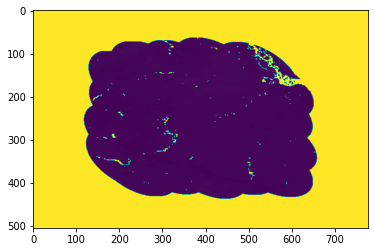

<AxesSubplot:>

In [8]:
show(array)

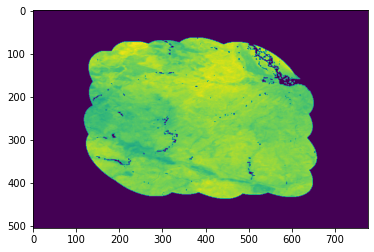

<AxesSubplot:>

In [9]:
show(new_array)